# HIGH DIMENSIONAL ANALYSIS
# Programing Exercise: 03
# Name: Trịnh Ngọc Hiến
# Student code: 19110315

In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist

In [ ]:
data = pd.read_csv('College.csv')
data.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


## a) Find all private schools with a graduation rate of higher than 90%. 

In [ ]:
dataPrivate = data[data['Private'] == 'Yes']
dataPrivate.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
dataPrivate_Rate90 = data[data['Grad.Rate'] >= 90]
dataPrivate_Rate90.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
16,Amherst College,Yes,4302,992,418,83,96,1593,5,19760,5300,660,1598,93,98,8.4,63,21424,100
37,Barnard College,Yes,2496,1402,531,53,95,2121,69,17926,8124,600,850,83,93,10.3,33,12580,91
60,Bowdoin College,Yes,3356,1019,418,76,100,1490,8,19030,5885,1495,875,93,96,11.2,52,20447,96
70,Brown University,Yes,12586,3239,1462,87,95,5643,349,19528,5926,720,1100,99,100,7.6,39,20440,97
72,Bucknell University,Yes,6548,3813,862,49,85,3316,31,18550,4750,800,1200,95,97,14.2,36,13675,93


## b) Using all attributes from the initial dataset except for the Private attribute, do the K-mean clustering method with two clusters:
1. Implement k-means clustering from scratch
2. Apply sklearn’s k-means


In [ ]:
X = data.iloc[:,2:].values
X

array([[1.6600e+03, 1.2320e+03, 7.2100e+02, ..., 1.2000e+01, 7.0410e+03,
        6.0000e+01],
       [2.1860e+03, 1.9240e+03, 5.1200e+02, ..., 1.6000e+01, 1.0527e+04,
        5.6000e+01],
       [1.4280e+03, 1.0970e+03, 3.3600e+02, ..., 3.0000e+01, 8.7350e+03,
        5.4000e+01],
       ...,
       [2.0970e+03, 1.9150e+03, 6.9500e+02, ..., 2.0000e+01, 8.3230e+03,
        4.9000e+01],
       [1.0705e+04, 2.4530e+03, 1.3170e+03, ..., 4.9000e+01, 4.0386e+04,
        9.9000e+01],
       [2.9890e+03, 1.8550e+03, 6.9100e+02, ..., 2.8000e+01, 4.5090e+03,
        9.9000e+01]])

## Hàm Kmeans tự viết:

In [ ]:
def Kmeans(X,k):
  n = X.shape[0]
  centers = X[np.random.choice(n, k, replace=False)]
  closest = np.zeros(n).astype(int)

  while True:
    old_closest = closest.copy()
    distances = cdist(X,centers)
    
    closest = np.argmin(distances, axis=1)
    
    for i in range(k):
      centers[i, :] = X[closest == i].mean(axis = 0)
    

    if all(closest == old_closest):
      break

  return closest, centers

## Hàm Kmeans có sẵn trong sklearn:

In [ ]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=2).fit(X)
clusters_kmean = kmean.predict(X)
centers_kmean = kmean.cluster_centers_

### Kết quả theo hàm Kmeans tự viết: (câu b)

In [ ]:
labels, centers = Kmeans(X,2)

In [ ]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
centers

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.51195815e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

### Kết quả theo hàm Kmean có sẵn trong sklearn: (câu b)

In [ ]:
clusters_kmean

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
centers_kmean

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01],
       [1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.51195815e+01]])

## c) Compare the results of your k-means and sklearn with the Private attribute (ground-truth).

In [ ]:
data['Private'] = data['Private'].map({'Yes': 1, 'No': 0})

In [ ]:
data['Private']

0      1
1      1
2      1
3      1
4      1
      ..
772    0
773    1
774    1
775    1
776    1
Name: Private, Length: 777, dtype: int64

In [ ]:
Y = data.iloc[:,1:].values
Y

array([[1.0000e+00, 1.6600e+03, 1.2320e+03, ..., 1.2000e+01, 7.0410e+03,
        6.0000e+01],
       [1.0000e+00, 2.1860e+03, 1.9240e+03, ..., 1.6000e+01, 1.0527e+04,
        5.6000e+01],
       [1.0000e+00, 1.4280e+03, 1.0970e+03, ..., 3.0000e+01, 8.7350e+03,
        5.4000e+01],
       ...,
       [1.0000e+00, 2.0970e+03, 1.9150e+03, ..., 2.0000e+01, 8.3230e+03,
        4.9000e+01],
       [1.0000e+00, 1.0705e+04, 2.4530e+03, ..., 4.9000e+01, 4.0386e+04,
        9.9000e+01],
       [1.0000e+00, 2.9890e+03, 1.8550e+03, ..., 2.8000e+01, 4.5090e+03,
        9.9000e+01]])

Text(0.5, 0, 'iter')

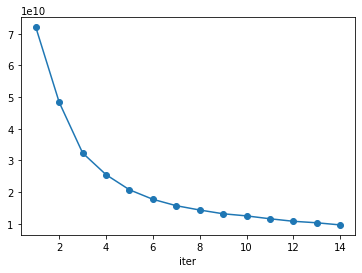

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
 

sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(Y)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances,'-o')
plt.xlabel('iter')

- Qua đó có thể thấy số lượng n_clusters có thể lấy tốt nhất là từ 9 trở đi.
- Chọn n_clusters là 10.

### Kết quả theo hàm Kmeans tự viết: (câu c)

In [ ]:
labels_Private, centers_Private = Kmeans(Y,10)

In [ ]:
labels_Private

array([3, 7, 6, 4, 6, 7, 7, 7, 7, 6, 7, 0, 6, 7, 6, 6, 4, 6, 6, 3, 8, 2,
       6, 5, 7, 3, 6, 1, 6, 7, 6, 7, 6, 6, 6, 6, 0, 0, 6, 2, 7, 6, 6, 3,
       7, 3, 6, 4, 9, 6, 6, 6, 3, 3, 6, 3, 2, 3, 6, 5, 4, 1, 4, 9, 0, 6,
       3, 6, 6, 5, 0, 4, 0, 6, 7, 6, 6, 7, 1, 2, 6, 3, 3, 6, 7, 6, 4, 8,
       6, 3, 7, 4, 3, 6, 7, 6, 7, 3, 6, 6, 7, 6, 2, 2, 2, 3, 7, 7, 4, 6,
       6, 6, 3, 3, 4, 0, 6, 7, 1, 3, 7, 6, 0, 0, 6, 2, 6, 7, 7, 6, 7, 6,
       6, 6, 6, 6, 6, 0, 9, 0, 0, 1, 3, 6, 8, 6, 3, 6, 6, 0, 7, 7, 4, 3,
       3, 6, 6, 7, 8, 4, 6, 3, 0, 7, 0, 3, 3, 6, 3, 6, 6, 9, 0, 6, 8, 4,
       1, 2, 3, 6, 3, 2, 6, 6, 4, 7, 7, 6, 3, 9, 6, 8, 3, 6, 6, 3, 9, 3,
       6, 3, 7, 2, 3, 1, 3, 9, 3, 3, 6, 7, 9, 3, 6, 7, 6, 3, 6, 6, 2, 0,
       6, 0, 2, 2, 6, 0, 3, 7, 7, 6, 4, 6, 6, 2, 6, 6, 6, 4, 3, 7, 7, 6,
       4, 7, 7, 2, 6, 3, 3, 0, 8, 4, 6, 6, 7, 7, 0, 9, 7, 7, 7, 6, 6, 6,
       6, 3, 6, 6, 7, 1, 7, 6, 6, 2, 5, 6, 9, 1, 9, 1, 2, 3, 3, 9, 8, 3,
       6, 7, 1, 6, 3, 6, 0, 6, 6, 6, 7, 6, 9, 0, 6,

In [ ]:
centers_Private

array([[1.00000000e+00, 3.93660000e+03, 2.31462222e+03, 6.73644444e+02,
        4.75111111e+01, 7.78444444e+01, 2.60377778e+03, 1.86533333e+02,
        1.80810222e+04, 5.51942222e+03, 5.97800000e+02, 9.22644444e+02,
        8.92888889e+01, 9.44444444e+01, 1.10866667e+01, 3.49111111e+01,
        1.46165778e+04, 8.13111111e+01],
       [8.00000000e-02, 9.51616000e+03, 6.48684000e+03, 2.59074000e+03,
        3.04000000e+01, 6.20800000e+01, 1.36896600e+04, 3.26798000e+03,
        8.48214000e+03, 4.23654000e+03, 6.03740000e+02, 1.93570000e+03,
        8.38200000e+01, 8.95200000e+01, 1.58740000e+01, 1.58000000e+01,
        9.65414000e+03, 6.00600000e+01],
       [6.17283951e-02, 4.53188889e+03, 3.11007407e+03, 1.43433333e+03,
        1.94814815e+01, 5.05802469e+01, 7.63086420e+03, 2.00683951e+03,
        6.27049383e+03, 3.55527160e+03, 5.37925926e+02, 1.64767901e+03,
        7.61481481e+01, 8.25925926e+01, 1.78407407e+01, 1.38271605e+01,
        6.64341975e+03, 5.41111111e+01],
       [5.362

### Kết quả theo hàm Kmeans có sẵn trong sklearn: (câu c)

In [ ]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=10).fit(Y)
clustersPrivate_kmean = kmean.predict(Y)
centersPrivate_kmean = kmean.cluster_centers_

In [ ]:
clustersPrivate_kmean

array([5, 2, 2, 4, 5, 2, 2, 2, 4, 2, 4, 4, 2, 2, 5, 5, 4, 2, 2, 0, 8, 0,
       2, 6, 2, 5, 2, 7, 2, 2, 2, 2, 5, 5, 2, 2, 4, 4, 2, 0, 2, 5, 5, 5,
       4, 5, 5, 4, 2, 5, 5, 5, 5, 5, 2, 5, 0, 5, 2, 1, 4, 7, 4, 2, 4, 5,
       5, 2, 2, 6, 3, 4, 4, 2, 2, 2, 5, 2, 7, 7, 2, 5, 5, 2, 2, 5, 4, 3,
       2, 5, 2, 4, 5, 5, 4, 2, 2, 5, 2, 5, 2, 2, 0, 0, 0, 5, 2, 4, 4, 2,
       2, 5, 5, 5, 4, 4, 2, 4, 7, 5, 2, 2, 4, 4, 2, 0, 5, 2, 2, 2, 2, 2,
       2, 5, 2, 5, 2, 4, 0, 4, 4, 7, 5, 2, 3, 5, 5, 2, 5, 4, 2, 2, 4, 5,
       5, 5, 5, 2, 3, 4, 2, 5, 4, 2, 4, 5, 5, 5, 5, 5, 2, 2, 4, 5, 3, 4,
       7, 0, 5, 2, 5, 0, 2, 5, 4, 2, 2, 2, 5, 0, 5, 3, 5, 2, 2, 5, 4, 5,
       5, 5, 2, 0, 5, 7, 5, 2, 0, 5, 5, 2, 2, 5, 5, 4, 2, 5, 5, 2, 0, 4,
       5, 3, 0, 0, 5, 4, 5, 2, 2, 2, 4, 2, 5, 0, 2, 5, 2, 4, 5, 2, 2, 2,
       4, 2, 2, 0, 5, 5, 5, 4, 8, 4, 5, 5, 2, 2, 4, 0, 4, 2, 2, 2, 5, 2,
       5, 5, 2, 5, 4, 7, 2, 5, 5, 0, 6, 5, 2, 7, 2, 7, 0, 0, 5, 2, 8, 5,
       5, 2, 7, 5, 5, 5, 4, 5, 2, 5, 4, 5, 2, 4, 5,

In [ ]:
centersPrivate_kmean

array([[ 1.09890110e-01,  4.48275824e+03,  3.02790110e+03,
         1.33689011e+03,  2.01318681e+01,  5.05824176e+01,
         6.89178022e+03,  1.88052747e+03,  6.48742857e+03,
         3.66020879e+03,  5.40450549e+02,  1.64701099e+03,
         7.52527473e+01,  8.20219780e+01,  1.75769231e+01,
         1.40989011e+01,  6.87239560e+03,  5.46593407e+01],
       [ 2.77777778e-01,  1.43775000e+04,  8.99888889e+03,
         3.15422222e+03,  4.26666667e+01,  7.23333333e+01,
         1.50910556e+04,  3.69983333e+03,  1.12777222e+04,
         5.01111111e+03,  5.95111111e+02,  1.56027778e+03,
         8.75000000e+01,  9.15000000e+01,  1.27388889e+01,
         1.60555556e+01,  1.34465556e+04,  6.83333333e+01],
       [ 9.87854251e-01,  1.44168016e+03,  1.12233198e+03,
         3.82133603e+02,  2.58502024e+01,  5.43036437e+01,
         1.55659109e+03,  4.55655870e+02,  1.19235992e+04,
         4.71031579e+03,  5.38473684e+02,  1.16414575e+03,
         7.06599190e+01,  7.88380567e+01,  1.31222672e